# Projeto Titanic

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [6]:
df = pd.read_csv('train.csv')

## Limpreza dos dados

In [7]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [8]:
Y = df['Survived'].values.ravel()
X = df



In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

transformers = [
    ('imp_age', SimpleImputer(strategy='mean'), ['Age']),
    ('imp_Embarked', SimpleImputer(strategy='constant', fill_value='Unknow') , ['Embarked']),
    
]

ct_imp = ColumnTransformer(
    transformers, remainder='passthrough'
)

X_imp = ct_imp.fit_transform(X)

X_imputed = pd.DataFrame(X_imp, columns=['Age','Embarked','Survived','Pclass','Sex','SibSp','Parch','Fare'])


transformers = [
    ('oe_embarked', OrdinalEncoder(), ['Sex']),
    ('oh_embarked', OrdinalEncoder(), ['Embarked']),
]

ct_oeh = ColumnTransformer(
    transformers, remainder='passthrough'
)


X_oeh_Array = ct_oeh.fit_transform(X_imputed)
X_oeh_Array

X_oeh = pd.DataFrame(X_oeh_Array, columns=['Sex','Embarked','Age','Survived','Pclass','SibSp','Parch','Fare'])

pd.set_option('display.max_columns', None) 
X.groupby('Survived').describe()


Pclass                                                 Age  \
          count      mean       std  min  25%  50%  75%  max  count   
Survived                                                              
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0  424.0   
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0  290.0   

                                                              SibSp            \
               mean        std   min   25%   50%   75%   max  count      mean   
Survived                                                                        
0         30.626179  14.172110  1.00  21.0  28.0  39.0  74.0  549.0  0.553734   
1         28.343690  14.950952  0.42  19.0  28.0  36.0  80.0  342.0  0.473684   

                                             Parch                           \
               std  min  25%  50%  75%  max  count      mean       std  min   
Survived                                                                      
0         1.288399  0.0  0.0  0.0  1.0  8.0  549.0  0.329690  0.823166  0.0   
1         0.708688  0.0  0.0  0.0  1.0  4.0  342.0  0.464912  0.771712  0.0   

                               Fare                                            \
          25%  50%  75%  max  count       mean        std  min      25%   50%   
Survived                                                                        
0         0.0  0.0  0.0  6.0  549.0  22.117887  31.388207  0.0   7.8542  10.5   
1         0.0  0.0  1.0  5.0  342.0  48.395408  66.596998  0.0  12.4750  26.0   

                          
           75%       max  
Survived                  
0         26.0  263.0000  
1         57.0  512.3292

Pclass é um atributo com menor variância e uma boa distribuição entre as médias

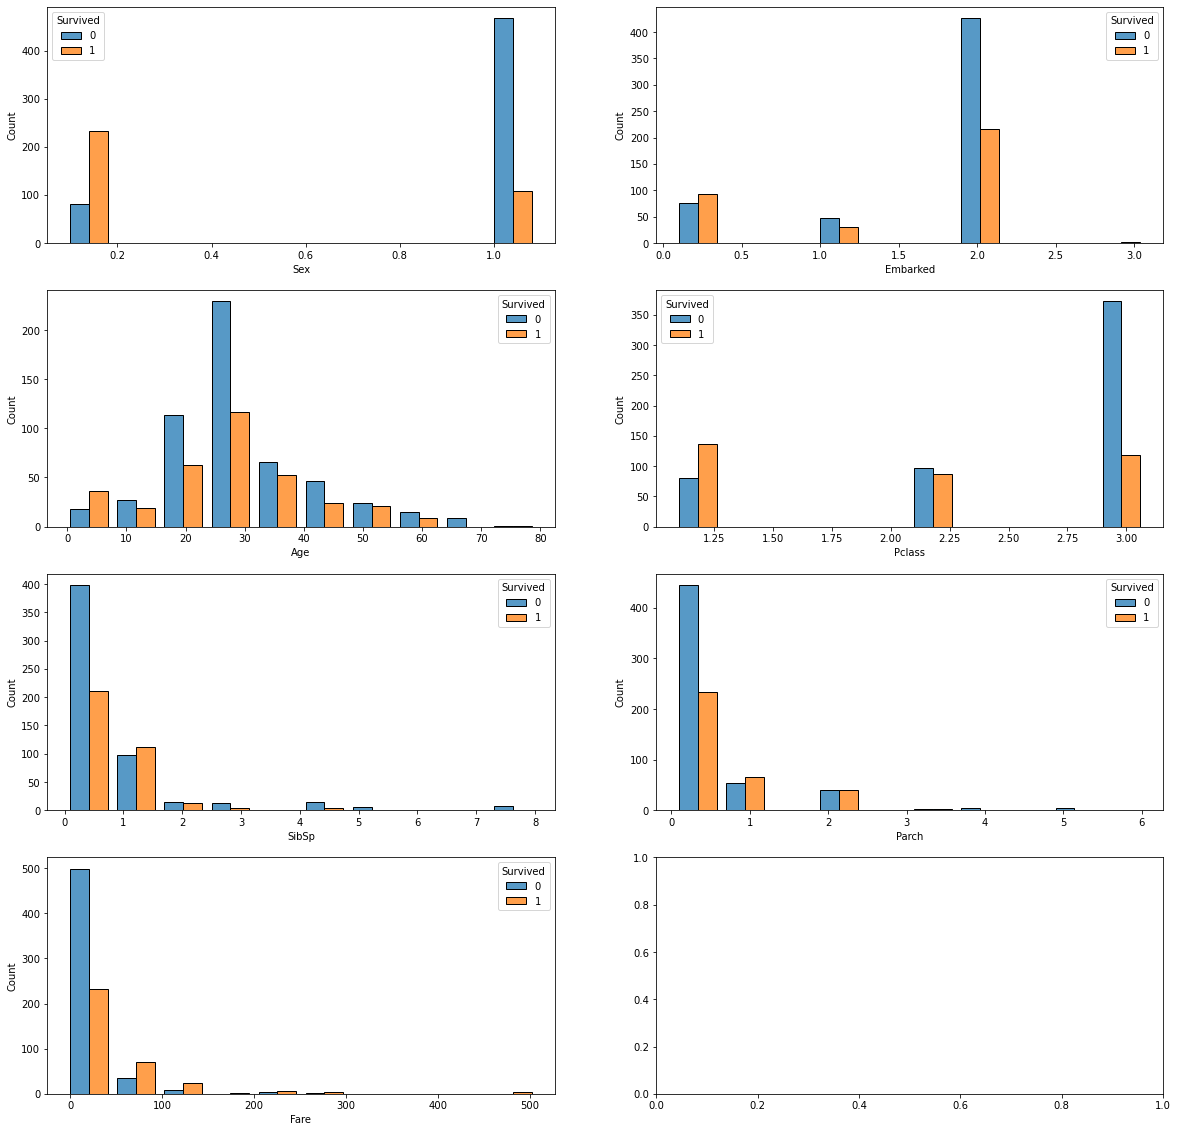

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
sns.histplot(data=X_oeh, bins=10, x='Sex', hue='Survived', multiple='dodge', shrink=0.8, ax=axes[0][0])
sns.histplot(data=X_oeh, bins=10, x='Embarked', hue='Survived', multiple='dodge', shrink=0.8, ax=axes[0][1])
sns.histplot(data=X_oeh, bins=10, x='Age', hue='Survived', multiple='dodge', shrink=0.8, ax=axes[1][0])
sns.histplot(data=X_oeh, bins=10, x='Pclass', hue='Survived', multiple='dodge', shrink=0.8, ax=axes[1][1])
sns.histplot(data=X_oeh, bins=10, x='SibSp', hue='Survived', multiple='dodge', shrink=0.8, ax=axes[2][0])
sns.histplot(data=X_oeh, bins=10, x='Parch', hue='Survived', multiple='dodge', shrink=0.8, ax=axes[2][1])
sns.histplot(data=X_oeh, bins=10, x='Fare', hue='Survived', multiple='dodge', shrink=0.8, ax=axes[3][0])
plt.show()



Nos histogramas não existem divisões claras

Vemos no gráfico que a maioria dos homens nao sobreviveram e a maioria das mulheres conseguiram sair com vida. É possivel ver também que a maioria das pessoas pertencente à Pclass 3 também não iriam sobreviver

<AxesSubplot:xlabel='PC 0', ylabel='PC 1'>

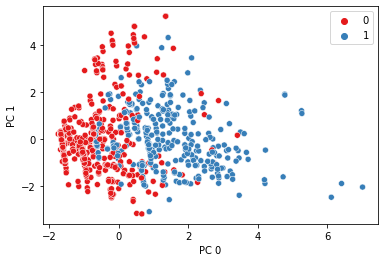

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
ss = StandardScaler()  # instancia o StandardScaler
ss.fit(X_oeh)              # estima a média e o desvio-padrão de todos atributos
X_ss = ss.transform(X_oeh) # realiza a normalização z-score nos atributos


pca_ss = PCA(n_components=2)
pca_ss.fit(X_ss)
X_ss_pca = pca_ss.transform(X_ss)
X_ss_pca_df = pd.DataFrame(X_ss_pca, columns=['PC 0', 'PC 1'])

sns.scatterplot(data=X_ss_pca_df, x='PC 0', y='PC 1', hue=Y, palette='Set1')



utilizando o PCA nos mostra que as features sõa minimamente divisíveis, contendo intercalações